In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [7]:
df=pd.read_csv('bank_data.csv')


In [8]:
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [17]:
print(df.expected_recovery_amount)

0        194
1        486
2        527
3        536
4        541
        ... 
1877    9785
1878    9857
1879    9859
1880    9920
1881    9964
Name: expected_recovery_amount, Length: 1882, dtype: int64


In [26]:
expected_recovery_amount = df['expected_recovery_amount'].tolist()
recovery_strategy = df['recovery_strategy'].tolist()

<function matplotlib.pyplot.show(close=None, block=None)>

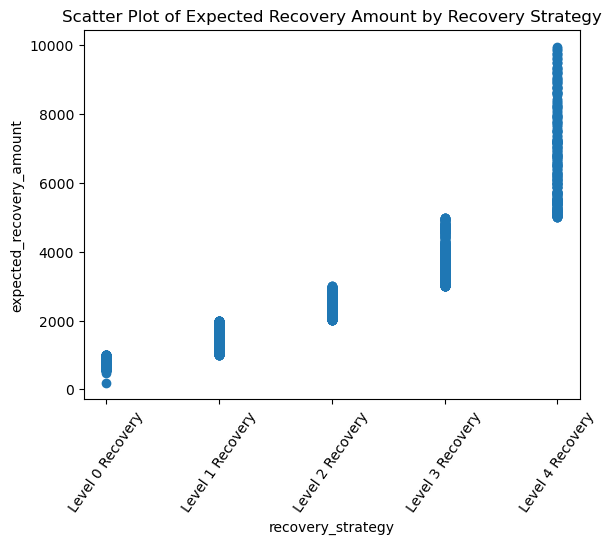

In [32]:
plt.scatter(recovery_strategy, expected_recovery_amount)
plt.xlabel('recovery_strategy')
plt.ylabel('expected_recovery_amount')
plt.title("Scatter Plot of Expected Recovery Amount by Recovery Strategy" )
plt.xticks(rotation= 55)
plt.show

In [59]:
data = pd.DataFrame({
    'expected_recovery_amount': expected_recovery_amount,
    'recovery_strategy': recovery_strategy,
})

In [60]:
data

,expected_recovery_amount,recovery_strategy
0,194,Level 0 Recovery
1,486,Level 0 Recovery
2,527,Level 0 Recovery
3,536,Level 0 Recovery
4,541,Level 0 Recovery
...,...,...
1877,9785,Level 4 Recovery
1878,9857,Level 4 Recovery
1879,9859,Level 4 Recovery
1880,9920,Level 4 Recovery


In [41]:
data = pd.get_dummies(data, columns =['recovery_strategy'], drop_first = True)

In [42]:
data

,expected_recovery_amount,recovery_strategy_Level 1 Recovery,recovery_strategy_Level 2 Recovery,recovery_strategy_Level 3 Recovery,recovery_strategy_Level 4 Recovery
0,194,0,0,0,0
1,486,0,0,0,0
2,527,0,0,0,0
3,536,0,0,0,0
4,541,0,0,0,0
...,...,...,...,...,...
1877,9785,0,0,0,1
1878,9857,0,0,0,1
1879,9859,0,0,0,1
1880,9920,0,0,0,1


In [45]:
data= sm.add_constant(data)

In [46]:
data

,const,expected_recovery_amount,recovery_strategy_Level 1 Recovery,recovery_strategy_Level 2 Recovery,recovery_strategy_Level 3 Recovery,recovery_strategy_Level 4 Recovery
0,1.0,194,0,0,0,0
1,1.0,486,0,0,0,0
2,1.0,527,0,0,0,0
3,1.0,536,0,0,0,0
4,1.0,541,0,0,0,0
...,...,...,...,...,...,...
1877,1.0,9785,0,0,0,1
1878,1.0,9857,0,0,0,1
1879,1.0,9859,0,0,0,1
1880,1.0,9920,0,0,0,1


In [51]:
X = data.drop('expected_recovery_amount', axis=1)
Y = data['expected_recovery_amount']
model= sm.OLS(Y,X).fit()


In [52]:
model

In [53]:
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     expected_recovery_amount   R-squared:                       0.904
Model:                                  OLS   Adj. R-squared:                  0.904
Method:                       Least Squares   F-statistic:                     4422.
Date:                      Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                              12:06:51   Log-Likelihood:                -14788.
No. Observations:                      1882   AIC:                         2.959e+04
Df Residuals:                          1877   BIC:                         2.961e+04
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [54]:
import pandas as pd

# Create a DataFrame with the recovery strategies
recovery_strategies = ['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery', 'Level 3 Recovery', 'Level 4 Recovery']
new_debt = pd.DataFrame({'recovery_strategy': recovery_strategies})

# Convert recovery strategy into numerical values using one-hot encoding
new_debt = pd.get_dummies(new_debt, columns=['recovery_strategy'], drop_first=True)

# Add a constant column for the intercept term in the linear regression model
new_debt = sm.add_constant(new_debt)

# Predict the expected recovery amount for the new debt
predicted_recovery_amount = model.predict(new_debt)

# Add the predicted recovery amount to the new_debt DataFrame
new_debt['predicted_recovery_amount'] = predicted_recovery_amount

# Display the new_debt DataFrame
print(new_debt)


   const  recovery_strategy_Level 1 Recovery  \
0    1.0                                   0   
1    1.0                                   1   
2    1.0                                   0   
3    1.0                                   0   
4    1.0                                   0   

   recovery_strategy_Level 2 Recovery  recovery_strategy_Level 3 Recovery  \
0                                   0                                   0   
1                                   0                                   0   
2                                   1                                   0   
3                                   0                                   1   
4                                   0                                   0   

   recovery_strategy_Level 4 Recovery  predicted_recovery_amount  
0                                   0                 825.372470  
1                                   0                1442.071642  
2                                   0          